# Convolutions

Looking at how convolutions can be used to process images.

## Imports

In [4]:
import numpy as np
from scipy.signal import convolve2d
from PIL import Image
import matplotlib.pylab as plt
%matplotlib inline

## Example image

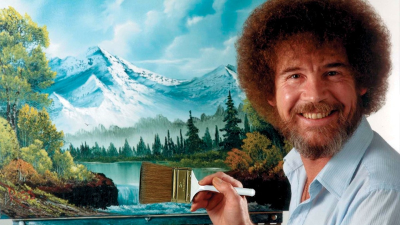

In [6]:
bobross_image = Image.open('images/bob_ross_small.png')
bobross_image

In [7]:
# convert to black and white numpy array for further processing
bobross = np.array(bobross_image.convert('L'))
bobross

array([[242, 242, 240, ..., 241, 241, 235],
       [242, 241, 241, ..., 241, 240, 235],
       [241, 241, 242, ..., 241, 241, 235],
       ..., 
       [198, 198, 200, ..., 131, 125, 134],
       [198, 199, 199, ..., 128, 127, 131],
       [200, 198, 199, ..., 123, 130, 127]], dtype=uint8)

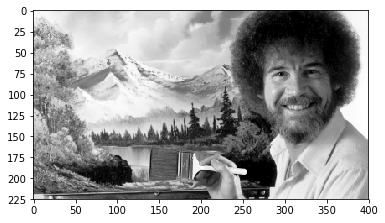

In [10]:
plt.imshow(bobross, cmap='Greys_r')

---
## Filters

Some filter examples stolen from:
https://en.wikipedia.org/wiki/Kernel_(image_processing)

In [14]:
# filters 1 - 3:
#    Edge detection

f1_edge = np.array([[1., 0., -1.], [0., 0., 0.], [-1., 0., 1.]])
f2_edge = np.array([[0., 1., 0.], [1., -4., 1.], [0., 1., 0.]])
f3_edge = np.array([[-1., -1., -1.], [-1., 8., -1.], [-1., -1., -1.]])

In [15]:
# filters 4 - 5:
#     Blurring

f4_blur = np.array([[1., 1., 1.], [1., 1., 1.], [1., 1., 1.]])/9.
f5_blur = np.array([[1., 2., 1.], [2., 4., 2.], [1., 2., 1.]])/16.

In [19]:
# filters 6 - 9:
#     AlexNet

f6_alexnet = np.array(Image.open('images/alexnet-1-small.png').convert('L')) \
    / np.array(Image.open('images/alexnet-1-small.png').convert('L')).sum()
f7_alexnet = np.array(Image.open('images/alexnet-2-small.png').convert('L')) \
    / np.array(Image.open('images/alexnet-2-small.png').convert('L')).sum()
f8_alexnet = np.array(Image.open('images/alexnet-3-small.png').convert('L')) \
    / np.array(Image.open('images/alexnet-3-small.png').convert('L')).sum()
f9_alexnet = np.array(Image.open('images/alexnet-4-small.png').convert('L')) \
    / np.array(Image.open('images/alexnet-4-small.png').convert('L')).sum()

In [20]:
f10 = np.array([[-1., 0., 1.], [0., 1., 0.], [1., 0., -1.]])

---
## Convolutions

In [46]:
# select small box of image to display zoomed-in convolution results for
xmin, xmax = 275, 295
ymin, ymax = 100, 120

In [47]:
def apply_filter_and_plot(k):
    f, ax = plt.subplots(1, 3, figsize=[17,4])
    convolution = convolve2d(bobross, k)
    ax[0].imshow(convolution, cmap='Greys_r', interpolation='nearest')
    ax[1].imshow(convolution[ymin:ymax, xmin:xmax], cmap=plt.get_cmap('gray'), interpolation='nearest')
    ax[2].imshow(k, cmap='Greys_r', interpolation='nearest');

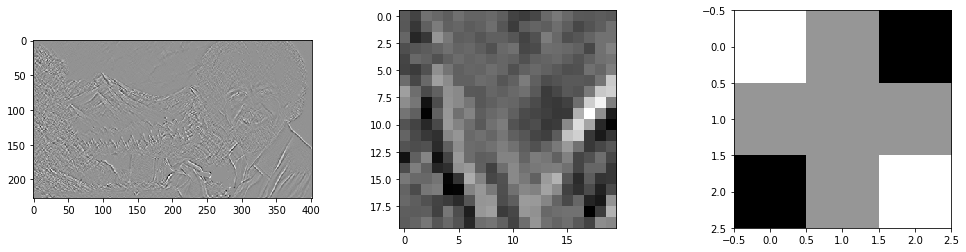

In [48]:
apply_filter_and_plot(f1_edge)

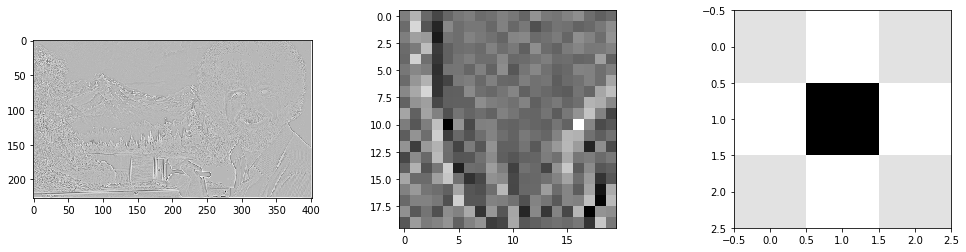

In [49]:
apply_filter_and_plot(f2_edge)

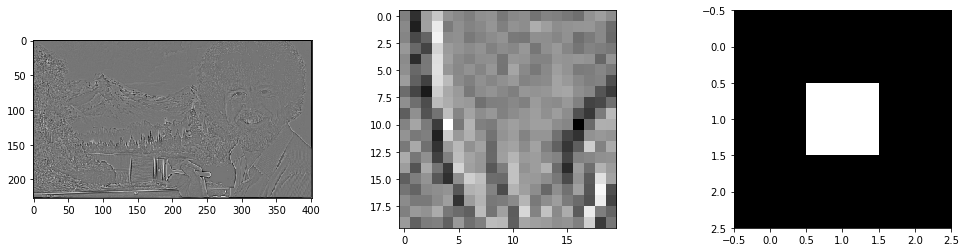

In [50]:
apply_filter_and_plot(f3_edge)

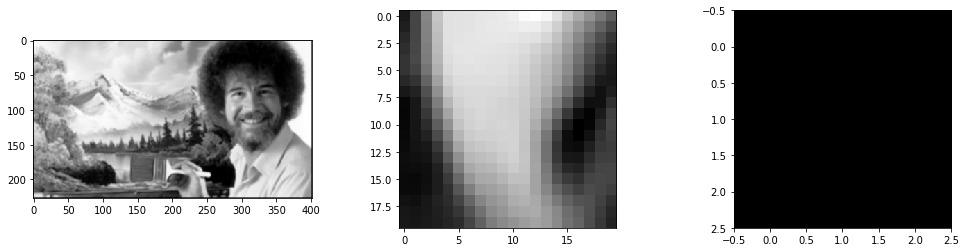

In [51]:
apply_filter_and_plot(f4_blur)

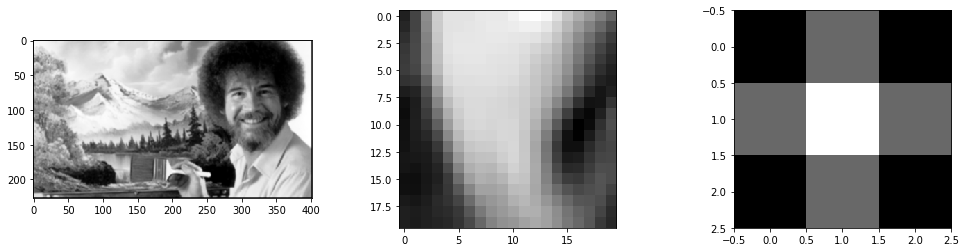

In [52]:
apply_filter_and_plot(f5_blur)

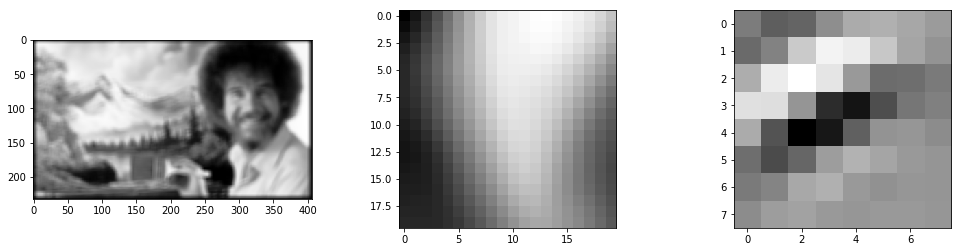

In [53]:
apply_filter_and_plot(f6_alexnet)

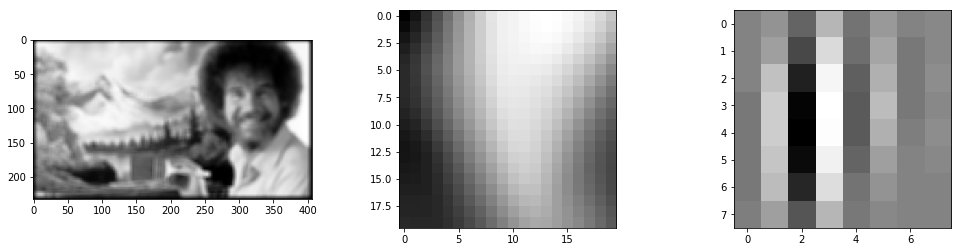

In [54]:
apply_filter_and_plot(f7_alexnet)

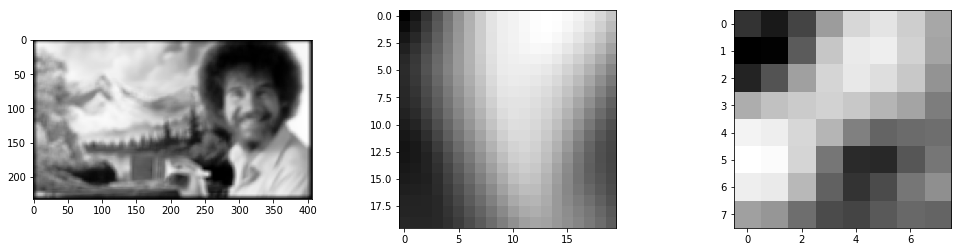

In [55]:
apply_filter_and_plot(f8_alexnet)

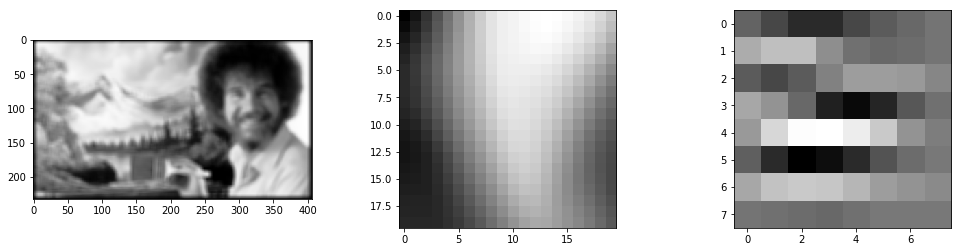

In [56]:
apply_filter_and_plot(f9_alexnet)

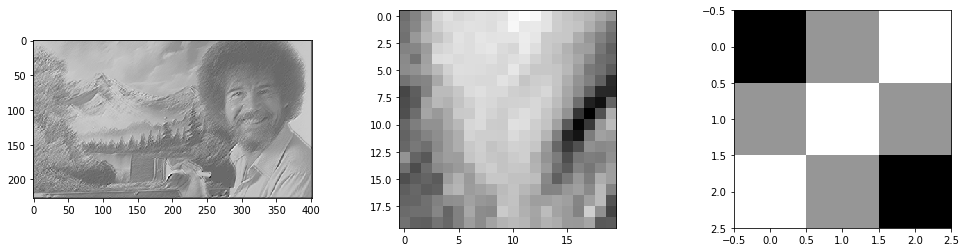

In [71]:
apply_filter_and_plot(f10)

---
## Combining results

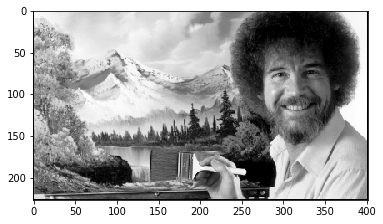

In [59]:
# Combining f1_edge and f10:
convolution_f1_f10 = convolve2d(bobross, f1_edge) + convolve2d(bobross, f10)
plt.imshow(convolution_f1_f10, cmap='Greys_r', interpolation='nearest');

In [60]:
diff = convolution_f1_f10[1:-1, 1:-1] - bobross
print(np.sum(diff))
# Convolving our original image with f1_edge and f10, and adding the two results, gives us back the original image!
#  --> this is to be expected, fecause f1_edge + f10 = the identity convolution (1 in the centre, zero elsewhere)

0.0


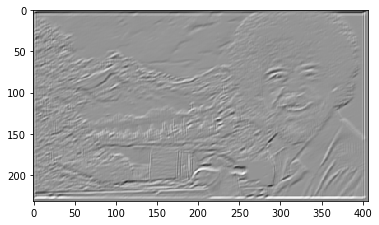

In [68]:
y = convolve2d(bobross, f7_alexnet) - convolve2d(bobross, f6_alexnet)
plt.imshow(y, cmap='Greys_r', interpolation='nearest');

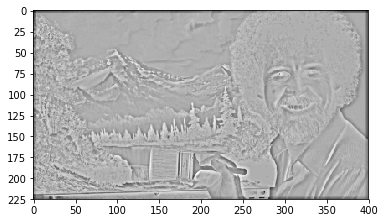

In [69]:
y = convolve2d(bobross, f7_alexnet, mode='same') - bobross
plt.imshow(y, cmap='Greys_r', interpolation='nearest');

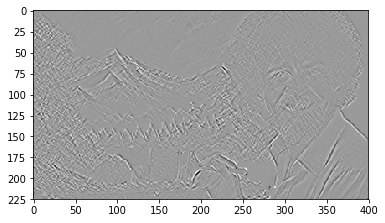

In [72]:
y = convolve2d(bobross, f10, mode='same') - bobross
plt.imshow(y, cmap='Greys_r', interpolation='nearest');